In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("full_df.csv")
df.sample(5)

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
4586  2121           56        Male  2121_left.jpg  2121_right.jpg   
1560  2381           35        Male  2381_left.jpg  2381_right.jpg   
2967  4415           31        Male  4415_left.jpg  4415_right.jpg   
4472  1686           51        Male  1686_left.jpg  1686_right.jpg   
4142  1125           37      Female  1125_left.jpg  1125_right.jpg   

                    Left-Diagnostic Keywords  \
4586                                cataract   
1560                           normal fundus   
2967  moderate non proliferative retinopathy   
4472                     pathological myopia   
4142    dry age-related macular degeneration   

                 Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
4586                         normal fundus  0  0  0  1  0  0  0  0   
1560                         normal fundus  1  0  0  0  0  0  0  0   
2967                         normal fundus  0  1  0  0  0  0  0  0   
4472                   pathological myopia  0  0  0  0  0  0  1  0   
4142  dry age-related macular degeneration  0  0  0  0  1  0  0  0   

                                               filepath labels  \
4586  ../input/ocular-disease-recognition-odir5k/ODI...  ['C']   
1560  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2967  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
4472  ../input/ocular-disease-recognition-odir5k/ODI...  ['M']   
4142  ../input/ocular-disease-recognition-odir5k/ODI...  ['A']   

                        target        filename  
4586  [0, 0, 0, 1, 0, 0, 0, 0]   2121_left.jpg  
1560  [1, 0, 0, 0, 0, 0, 0, 0]  2381_right.jpg  
2967  [1, 0, 0, 0, 0, 0, 0, 0]  4415_right.jpg  
4472  [0, 0, 0, 0, 0, 0, 1, 0]   1686_left.jpg  
4142  [0, 0, 0, 0, 1, 0, 0, 0]   1125_left.jpg

In [5]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [6]:
df = df.iloc[:,1:7]
df.head()

Patient Age Patient Sex Left-Fundus Right-Fundus  \
0           69      Female  0_left.jpg  0_right.jpg   
1           57        Male  1_left.jpg  1_right.jpg   
2           42        Male  2_left.jpg  2_right.jpg   
3           53        Male  4_left.jpg  4_right.jpg   
4           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  
0                           normal fundus  
1                           normal fundus  
2  moderate non proliferative retinopathy  
3       mild nonproliferative retinopathy  
4  moderate non proliferative retinopathy

In [7]:
df_left_cat = df[df['Left-Diagnostic Keywords'] == 'cataract']
df_left_cat.head()

Patient Age Patient Sex   Left-Fundus   Right-Fundus  \
0             69      Female    0_left.jpg    0_right.jpg   
86            55      Female  103_left.jpg  103_right.jpg   
100           59        Male  119_left.jpg  119_right.jpg   
218           60      Female  254_left.jpg  254_right.jpg   
256           69      Female  294_left.jpg  294_right.jpg   

    Left-Diagnostic Keywords    Right-Diagnostic Keywords  
0                   cataract                normal fundus  
86                  cataract                normal fundus  
100                 cataract                       drusen  
218                 cataract  macular epiretinal membrane  
256                 cataract                normal fundus

In [8]:
df_rt_cat = df[df['Right-Diagnostic Keywords'] == 'cataract']
df_rt_cat.head()

Patient Age Patient Sex   Left-Fundus   Right-Fundus  \
20            75      Female   24_left.jpg   24_right.jpg   
93            57      Female  112_left.jpg  112_right.jpg   
160           55      Female  188_left.jpg  188_right.jpg   
186           36      Female  218_left.jpg  218_right.jpg   
309           65        Male  354_left.jpg  354_right.jpg   

                              Left-Diagnostic Keywords  \
20                                       normal fundus   
93                                       normal fundus   
160  laser spot，severe proliferative diabetic retin...   
186                           refractive media opacity   
309                                      normal fundus   

    Right-Diagnostic Keywords  
20                   cataract  
93                   cataract  
160                  cataract  
186                  cataract  
309                  cataract

In [9]:
df_cat_filenames = df_left_cat['Left-Fundus'].append(df_rt_cat['Right-Fundus'], ignore_index=True)
df_cat_filenames.head()

0      0_left.jpg
1    103_left.jpg
2    119_left.jpg
3    254_left.jpg
4    294_left.jpg
dtype: object

In [10]:
df_cat_filenames.tail()

513    2239_right.jpg
514    2240_right.jpg
515    2242_right.jpg
516    2243_right.jpg
517    2246_right.jpg
dtype: object

In [11]:
len(df_cat_filenames)

518

In [12]:
# Sample Testing Image

In [13]:
img = df_cat_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

(512, 512, 3)
2099_left.jpg


In [14]:
# Making a Grid Plot

In [15]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_cat_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Cataract'.format(df_cat_filenames[i+9]))
    
plt.tight_layout()

In [16]:
df

Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0              69      Female     0_left.jpg     0_right.jpg   
1              57        Male     1_left.jpg     1_right.jpg   
2              42        Male     2_left.jpg     2_right.jpg   
3              53        Male     4_left.jpg     4_right.jpg   
4              50      Female     5_left.jpg     5_right.jpg   
...           ...         ...            ...             ...   
6387           63        Male  4686_left.jpg  4686_right.jpg   
6388           42        Male  4688_left.jpg  4688_right.jpg   
6389           54        Male  4689_left.jpg  4689_right.jpg   
6390           57        Male  4690_left.jpg  4690_right.jpg   
6391           58        Male  4784_left.jpg  4784_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                              Right-Diagnostic Keywords  
0                                         normal fundus  
1                                         normal fundus  
2                moderate non proliferative retinopathy  
3                     mild nonproliferative retinopathy  
4                moderate non proliferative retinopathy  
...                                                 ...  
6387                 proliferative diabetic retinopathy  
6388             moderate non proliferative retinopathy  
6389                                      normal fundus  
6390                  mild nonproliferative retinopathy  
6391  hypertensive retinopathy，age-related macular d...  

[6392 rows x 6 columns]

In [17]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

Patient Age Patient Sex  Left-Fundus  Right-Fundus  \
1            57        Male   1_left.jpg   1_right.jpg   
7            59        Male   8_left.jpg   8_right.jpg   
8            54        Male   9_left.jpg   9_right.jpg   
12           55        Male  14_left.jpg  14_right.jpg   
13           50        Male  15_left.jpg  15_right.jpg   

   Left-Diagnostic Keywords    Right-Diagnostic Keywords  
1             normal fundus                normal fundus  
7             normal fundus                normal fundus  
8             normal fundus        vitreous degeneration  
12            normal fundus  macular epiretinal membrane  
13            normal fundus      myelinated nerve fibers

In [18]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

Patient Age Patient Sex  Left-Fundus  Right-Fundus  \
0            69      Female   0_left.jpg   0_right.jpg   
1            57        Male   1_left.jpg   1_right.jpg   
7            59        Male   8_left.jpg   8_right.jpg   
9            70        Male  10_left.jpg  10_right.jpg   
24           59        Male  29_left.jpg  29_right.jpg   

   Left-Diagnostic Keywords Right-Diagnostic Keywords  
0                  cataract             normal fundus  
1             normal fundus             normal fundus  
7             normal fundus             normal fundus  
9       epiretinal membrane             normal fundus  
24      epiretinal membrane             normal fundus

In [19]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [20]:
len(df_cat_filenames)

518

In [21]:
df_nor_filenames = df_nor_filenames.sample(518)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0    1610_right.jpg
1     2945_left.jpg
2     3339_left.jpg
3      307_left.jpg
4    2373_right.jpg
dtype: object

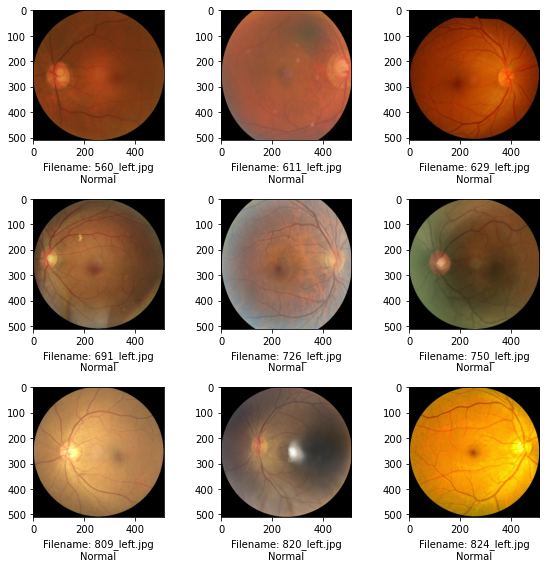

In [22]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_cat_filenames[i+9]))
    
plt.tight_layout()

In [23]:
df_cat_filenames

0          0_left.jpg
1        103_left.jpg
2        119_left.jpg
3        254_left.jpg
4        294_left.jpg
            ...      
513    2239_right.jpg
514    2240_right.jpg
515    2242_right.jpg
516    2243_right.jpg
517    2246_right.jpg
Length: 518, dtype: object

In [24]:
df_cat_filenames = pd.DataFrame(df_cat_filenames, columns = ["filename"])
df_cat_filenames["label"] = "cataract"
df_cat_filenames.head()

filename     label
0    0_left.jpg  cataract
1  103_left.jpg  cataract
2  119_left.jpg  cataract
3  254_left.jpg  cataract
4  294_left.jpg  cataract

In [25]:
df_nor_filenames

0      1610_right.jpg
1       2945_left.jpg
2       3339_left.jpg
3        307_left.jpg
4      2373_right.jpg
            ...      
513     1021_left.jpg
514     942_right.jpg
515     3415_left.jpg
516     2919_left.jpg
517    3328_right.jpg
Length: 518, dtype: object

In [26]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

filename   label
0  1610_right.jpg  normal
1   2945_left.jpg  normal
2   3339_left.jpg  normal
3    307_left.jpg  normal
4  2373_right.jpg  normal

In [27]:
df_combined = df_cat_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

filename     label
0         0_left.jpg  cataract
1       103_left.jpg  cataract
2       119_left.jpg  cataract
3       254_left.jpg  cataract
4       294_left.jpg  cataract
...              ...       ...
1031   1021_left.jpg    normal
1032   942_right.jpg    normal
1033   3415_left.jpg    normal
1034   2919_left.jpg    normal
1035  3328_right.jpg    normal

[1036 rows x 2 columns]

In [28]:
df_combined = df_combined.sample(1036)
df_combined = df_combined.reset_index(drop=True)
df_combined

filename     label
0      2147_left.jpg  cataract
1     2784_right.jpg    normal
2        85_left.jpg    normal
3     2572_right.jpg    normal
4      3290_left.jpg    normal
...              ...       ...
1031   2204_left.jpg  cataract
1032   3012_left.jpg    normal
1033    254_left.jpg  cataract
1034    896_left.jpg    normal
1035  2771_right.jpg    normal

[1036 rows x 2 columns]

In [29]:
a  = np.array(df_combined.filename)

In [30]:
a.shape

(1036,)

In [31]:
paths = []

In [32]:
type(paths)

list

In [33]:
for i in range(1036):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [34]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2147_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2784_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\85_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2572_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3290_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\949_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\726_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4335_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3042_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2140_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2542_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2221_left.jpg',
 'C:\\Users\

In [35]:
data = []

In [79]:
data1 = []
for i in range(1036):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[299,299])
    data1.append(image)
data1 = np.array(data1)

In [36]:
for i in range(1036):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [80]:
x1 = data1
y1 = []
for i in df_combined.label:
    if(i=='cataract'):
        y1.append(1)
    else:
        y1.append(0)
y1 = np.array(y1)

In [81]:
from sklearn.model_selection import train_test_split
x1_train,x1_val,y1_train,y1_val = train_test_split(x1,y1,test_size=0.2)
x1_val,x1_test,y1_val,y1_test = train_test_split(x1_val,y1_val,test_size=0.5)

print(len(x1_train))
print(len(x1_val))
print(len(x1_test))

828
104
104


In [37]:
len(data)

1036

In [38]:
type(data)

list

In [39]:
arr = np.array(data)

In [40]:
arr.shape

(1036, 224, 224, 3)

In [41]:
data = arr

In [42]:
type(data)

numpy.ndarray

In [43]:
x = data
y = []
for i in df_combined.label:
    if(i=='cataract'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [44]:
y[:5]

array([1, 0, 0, 0, 0])

### Splitting of Data in training,testing and validation set

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

828
104
104


In [158]:
from keras.preprocessing.image import ImageDataGenerator

### Data Augmentation

In [167]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [160]:
from tensorflow.keras.models import Sequential

In [169]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


26/26 [==============================] - 35s 1s/step - loss: 0.7489 - accuracy: 0.5205
Epoch 2/30
26/26 [==============================] - 32s 1s/step - loss: 0.6403 - accuracy: 0.6256
Epoch 3/30
26/26 [==============================] - 32s 1s/step - loss: 0.5905 - accuracy: 0.6630
Epoch 4/30
26/26 [==============================] - 32s 1s/step - loss: 0.5621 - accuracy: 0.6920
Epoch 5/30
26/26 [==============================] - 31s 1s/step - loss: 0.5450 - accuracy: 0.7271
Epoch 6/30
26/26 [==============================] - 32s 1s/step - loss: 0.5325 - accuracy: 0.7560
Epoch 7/30
26/26 [==============================] - 32s 1s/step - loss: 0.5042 - accuracy: 0.7717
Epoch 8/30
26/26 [==============================] - 32s 1s/step - loss: 0.4833 - accuracy: 0.7742
Epoch 9/30
26/26 [==============================] - 32s 1s/step - loss: 0.4830 - accuracy: 0.7826
Epoch 10/30
26/26 [==============================] - 32s 1s/step - loss: 0.4632 - accuracy: 0.7935
Epoch 11/30
26/26 [===========

In [171]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 1s 256ms/step - loss: 0.2977 - accuracy: 0.8750


[0.297660768032074, 0.875]

In [172]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:9]

[0, 0, 1, 0, 1, 0, 1, 0, 0]

In [173]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        48
           1       0.58      0.54      0.56        56

    accuracy                           0.54       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.54      0.54      0.54       104



In [47]:
x_train = x_train/255
x_train

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [48]:
x_test = x_test/255

In [49]:
x_val = x_val/255

In [50]:
print(y_train[:5])
print(y_test[:8])
print(y_val[:10])

[1 0 1 0 1]
[0 1 1 1 1 1 0 0]
[0 1 1 1 0 1 1 1 1 1]


# Thanks to StackOverflow

In [128]:
# from keras.applications.vgg16 import VGG16, preprocess_input
# # vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# vgg = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3)
# )

In [129]:
# for layer in vgg.layers:
#     layer.trainable = False

In [130]:
# from tensorflow.keras import Sequential
# from keras import layers
# from tensorflow.keras.layers import Flatten,Dense
# model = Sequential()
# model.add(vgg)
# model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
# model.add(Dense(128, activation='sigmoid'))
# model.add(layers.Dropout(rate=0.2))
# model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(1,activation="sigmoid"))

In [131]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
# import tensorflow as tf
# def get_callbacks(model_name):
#     callbacks =[]
#     tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0)
#     callbacks.append(tensor_board)
#     checkpoint = tf.keras.callbacks.ModelCheckpoint(
#         filepath=f'model.{model_name}.h5',
#         verbose=1,
#          monitor='val_acc',
#     mode='max',
#     save_best_only=True)
#     # erly = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#     callbacks.append(checkpoint)
#     # callbacks.append(erly)
#     return callbacks

In [132]:
# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [133]:
# callbacks = get_callbacks('cnn')
# history = model.fit(x_train,y_train,batch_size=32,epochs=2,validation_data=(x_test,y_test),callbacks=[callbacks])

Epoch 1/2
26/26 [==============================] - 232s 9s/step - loss: 0.6992 - accuracy: 0.5507 - val_loss: 0.6275 - val_accuracy: 0.7019
Epoch 2/2
26/26 [==============================] - 221s 9s/step - loss: 0.4713 - accuracy: 0.8225 - val_loss: 0.3310 - val_accuracy: 0.8654


In [134]:
# model.evaluate(x_val,y_val)

4/4 [==============================] - 25s 6s/step - loss: 0.2456 - accuracy: 0.9135


[0.24557337164878845, 0.9134615659713745]

In [135]:
# model.evaluate(x_test,y_test)

4/4 [==============================] - 26s 6s/step - loss: 0.3310 - accuracy: 0.8654


[0.3309986889362335, 0.8653846383094788]

In [140]:
# from sklearn.metrics import classification_report
# from tensorflow.keras import Sequential

In [142]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# y_pred = model.predict(x_val)

In [143]:
# y_predicted = [np.argmax(i) for i in y_pred]

In [146]:
# accuracy_score(y_val,y_predicted)

0.46153846153846156

In [148]:
# print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        48
           1       0.00      0.00      0.00        56

    accuracy                           0.46       104
   macro avg       0.23      0.50      0.32       104
weighted avg       0.21      0.46      0.29       104



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
np.argmax(model.predict(x_test)[0])

0

# Transfer learning

## Mobilenet V2 Model

In [72]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [175]:

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [182]:

x0_resized = cv2.resize(x[0], IMAGE_SHAPE)
x1_resized = cv2.resize(x[1], IMAGE_SHAPE)
x2_resized = cv2.resize(x[2], IMAGE_SHAPE)

In [186]:
plt.axis('off')
plt.imshow(x[2])

In [187]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([620, 418, 418], dtype=int64)

### Taking a pretrained model and retraining it

In [188]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [189]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [191]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 32s 990ms/step - loss: 0.3652 - accuracy: 0.8454
Epoch 2/5
26/26 [==============================] - 26s 981ms/step - loss: 0.1524 - accuracy: 0.9469
Epoch 3/5
26/26 [==============================] - 26s 983ms/step - loss: 0.1346 - accuracy: 0.9493
Epoch 4/5
26/26 [==============================] - 26s 982ms/step - loss: 0.1215 - accuracy: 0.9565
Epoch 5/5
26/26 [==============================] - 26s 984ms/step - loss: 0.1175 - accuracy: 0.9589


In [194]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 3s 748ms/step - loss: 0.1636 - accuracy: 0.9231


[0.1636180281639099, 0.9230769276618958]

In [197]:
y_pre = model.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1]

In [196]:
y_val

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [199]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        48
           1       0.98      0.88      0.92        56

    accuracy                           0.92       104
   macro avg       0.93      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



In [200]:
img = cv2.imread(r'test_img.jpg')

In [202]:
img.shape

(274, 300, 3)

In [203]:
img = cv2.resize(img,[224,224])
img.shape

(224, 224, 3)

In [208]:
img = img/255

In [209]:
z = []

In [210]:
z.append(img)

In [211]:
img = cv2.imread(r'test_img2.jpg')

In [212]:
img.shape

(469, 600, 3)

In [213]:
img = cv2.resize(img,[224,224])
img = img/255
img.shape

(224, 224, 3)

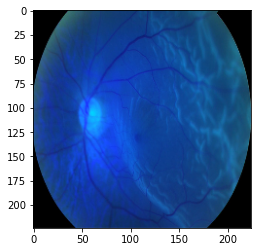

In [215]:
plt.imshow(img)

In [216]:
z.append(img)

In [218]:
z = np.array(z)

In [219]:
z.shape

(2, 224, 224, 3)

In [224]:
s = model.predict(z)

In [227]:
s1 = [np.argmax(i) for i in s]
s1

[0, 0]

# EfficientNet B4

In [238]:
model1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [239]:
num_of_classes = 2

model1 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1000)              19466816  
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 2002      
Total params: 19,468,818
Trainable params: 2,002
Non-trainable params: 19,466,816
_________________________________________________________________


In [240]:
model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 178s 6s/step - loss: 0.6794 - accuracy: 0.7790
Epoch 2/5
26/26 [==============================] - 192s 7s/step - loss: 0.6706 - accuracy: 0.7874
Epoch 3/5
26/26 [==============================] - 117s 4s/step - loss: 0.6620 - accuracy: 0.7947
Epoch 4/5
26/26 [==============================] - 85s 3s/step - loss: 0.6538 - accuracy: 0.7959
Epoch 5/5
26/26 [==============================] - 84s 3s/step - loss: 0.6458 - accuracy: 0.8043


In [234]:
model1.evaluate(x_val,y_val)

4/4 [==============================] - 20s 3s/step - loss: 0.6538 - accuracy: 0.8173


[0.6538177132606506, 0.817307710647583]

# Using VGG-16 Model

In [59]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [52]:
IMAGE_SIZE = [224,224]

In [53]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [54]:
for layers in vgg.layers:
    layers.trainable = False

In [55]:
x = Flatten()(vgg.output)

In [57]:
prediction = Dense(2,activation = 'softmax')(x)

In [61]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [62]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [67]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [68]:
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


26/26 [==============================] - 208s 8s/step - loss: 0.7999 - accuracy: 0.7065
Epoch 2/5
26/26 [==============================] - 211s 8s/step - loss: 0.2275 - accuracy: 0.9130
Epoch 3/5
26/26 [==============================] - 208s 8s/step - loss: 0.1897 - accuracy: 0.9348
Epoch 4/5
26/26 [==============================] - 206s 8s/step - loss: 0.1684 - accuracy: 0.9396
Epoch 5/5
26/26 [==============================] - 195s 7s/step - loss: 0.1419 - accuracy: 0.9553


In [70]:
model2.evaluate(x_test,y_test)

4/4 [==============================] - 23s 5s/step - loss: 0.1938 - accuracy: 0.9231


[0.19379903376102448, 0.9230769276618958]

# InceptionV3 Model

In [74]:
num_classes = 2

In [83]:
model3 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1",
                   trainable=False,input_shape=(299, 299, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [89]:
pretrained_model_without_top_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1",
    input_shape=(299, 299, 3), trainable=False)

In [90]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_classes)
])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [91]:
model3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [92]:
model3.fit(x1_train,y1_train,epochs=5)

Epoch 1/5
26/26 [==============================] - 100s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 2/5
26/26 [==============================] - 94s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 3/5
26/26 [==============================] - 94s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 4/5
26/26 [==============================] - 95s 4s/step - loss: 0.7084 - accuracy: 0.4783
Epoch 5/5
26/26 [==============================] - 95s 4s/step - loss: 0.7084 - accuracy: 0.4783


In [94]:
x_train.shape

(828, 224, 224, 3)